In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime 
from pandas_datareader import data as pdr
import pandas_ta as ta
import seaborn as sns
import yfinance as yf
from matplotlib.backends.backend_pdf import PdfPages
import mplfinance as mpf

# Load finance data
def getdata(sym,sma_value,ema_value,close):
    yf.pdr_override()
    today = datetime.datetime.now()
    df = pdr.get_data_yahoo(sym, start=datetime.datetime(today.year-10,today.month, 1),
                                    end=datetime.datetime(today.year, today.month, today.day)).reset_index()
    df['ticker'] =sym
        
    return df


def channel_detection(data,number_back, numberbrange):
    
    df = data.copy()
    backcandles= number_back
    brange = numberbrange #should be less than backcandles
    wind = 5
    length = backcandles-brange

    candleid = df.shape[0]-1

    optbackcandles= backcandles
    sldiff = 100
    sldist = 10000000

    for r1 in range(backcandles-brange, backcandles+brange):
        maxim = np.array([])
        minim = np.array([])
        xxmin = np.array([])
        xxmax = np.array([])

        for i in range(candleid-r1, candleid+1, wind):
            minim = np.append(minim, df.Low.iloc[i:i+wind].min())
            xxmin = np.append(xxmin, df.Low.iloc[i:i+wind].idxmin())
        for i in range(candleid-r1, candleid+1, wind):
            maxim = np.append(maxim, df.High.loc[i:i+wind].max())
            xxmax = np.append(xxmax, df.High.iloc[i:i+wind].idxmax())
        slmin, intercmin = np.polyfit(xxmin, minim,1)
        slmax, intercmax = np.polyfit(xxmax, maxim,1)

        dist = (slmax*candleid + intercmax)-(slmin*candleid + intercmin)
        if(dist<sldist): #abs(slmin-slmax)<sldiff and
            #sldiff = abs(slmin-slmax)
            sldist = dist
            optbackcandles=r1
            slminopt = slmin
            slmaxopt = slmax
            intercminopt = intercmin
            intercmaxopt = intercmax
            maximopt = maxim.copy()
            minimopt = minim.copy()
            xxminopt = xxmin.copy()
            xxmaxopt = xxmax.copy()


    dfpl = df[candleid-wind-optbackcandles-backcandles:candleid+optbackcandles]  


    adjintercmax = (df.High.iloc[xxmaxopt] - slmaxopt*xxmaxopt).max()
    adjintercmin = (df.Low.iloc[xxminopt] - slminopt*xxminopt).min()
    lower = pd.DataFrame(slminopt*xxminopt + adjintercmin)
    lower['Date']=df[df.index.isin(xxminopt)].Date.values
    lower = list(zip(lower['Date'].astype(str).tolist(), lower[0].tolist()))
    upper = pd.DataFrame(slmaxopt*xxmaxopt + adjintercmax)
    upper['Date']=df[df.index.isin(xxmaxopt)].Date.values
    upper = list(zip(upper['Date'].astype(str).tolist(), upper[0].tolist()))
    
    return lower, upper
    
    


[*********************100%***********************]  1 of 1 completed


C:\Users\CHIN\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\CHIN\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('

[*********************100%***********************]  1 of 1 completed


C:\Users\CHIN\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\CHIN\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('

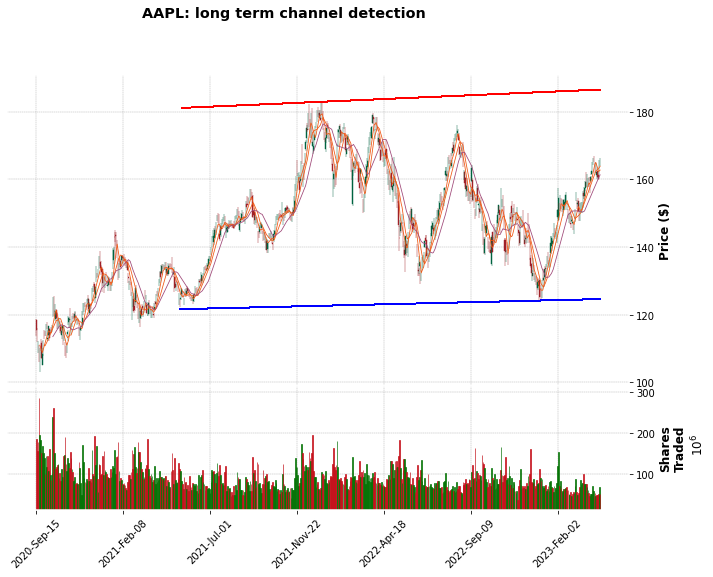

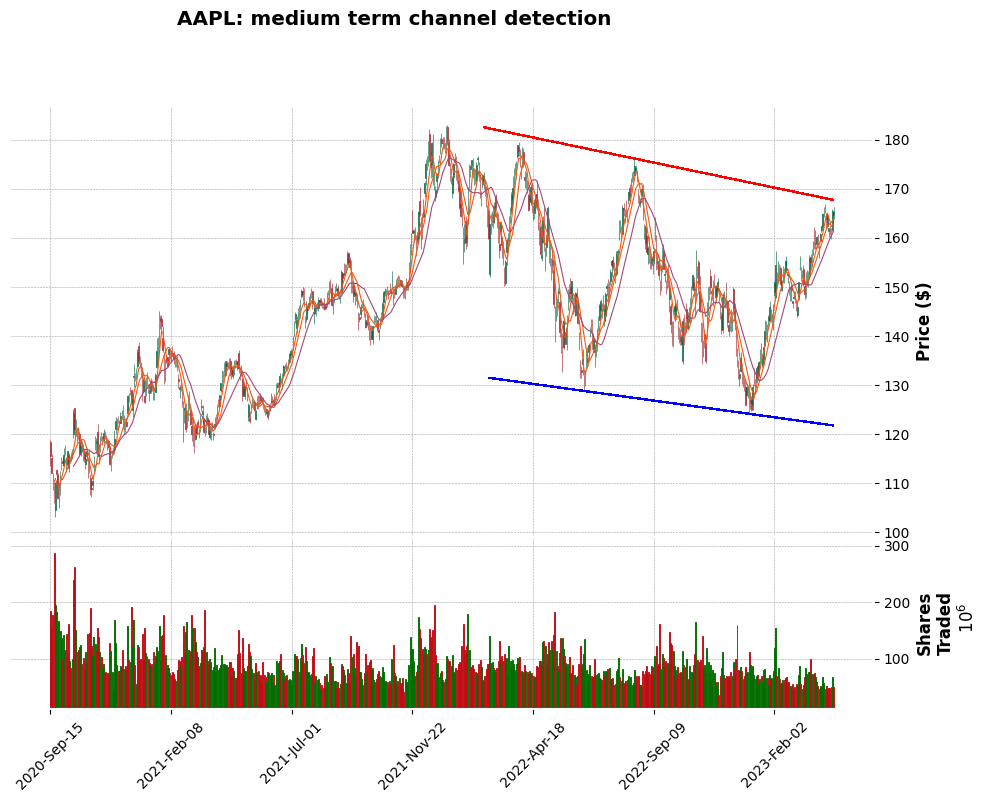

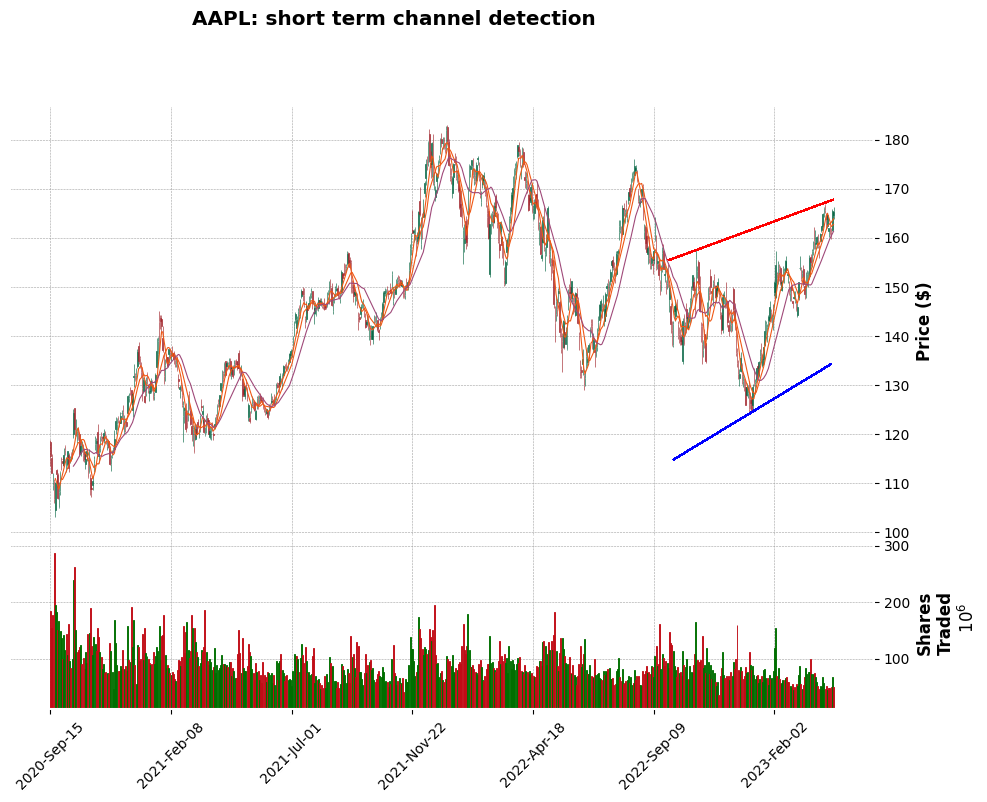

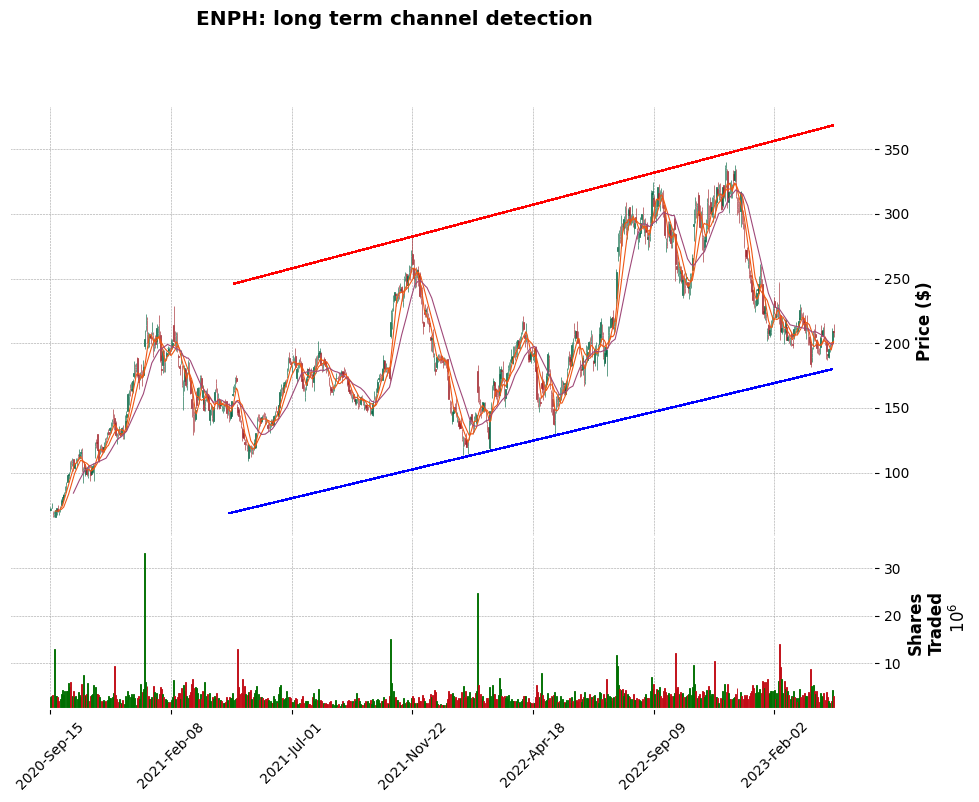

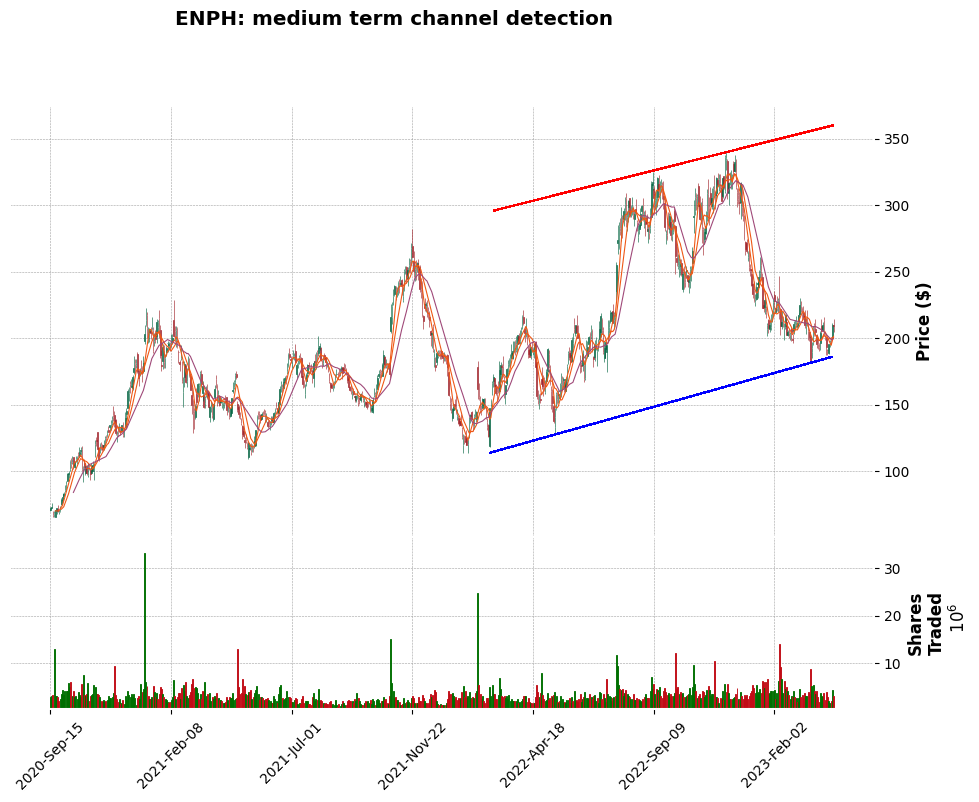

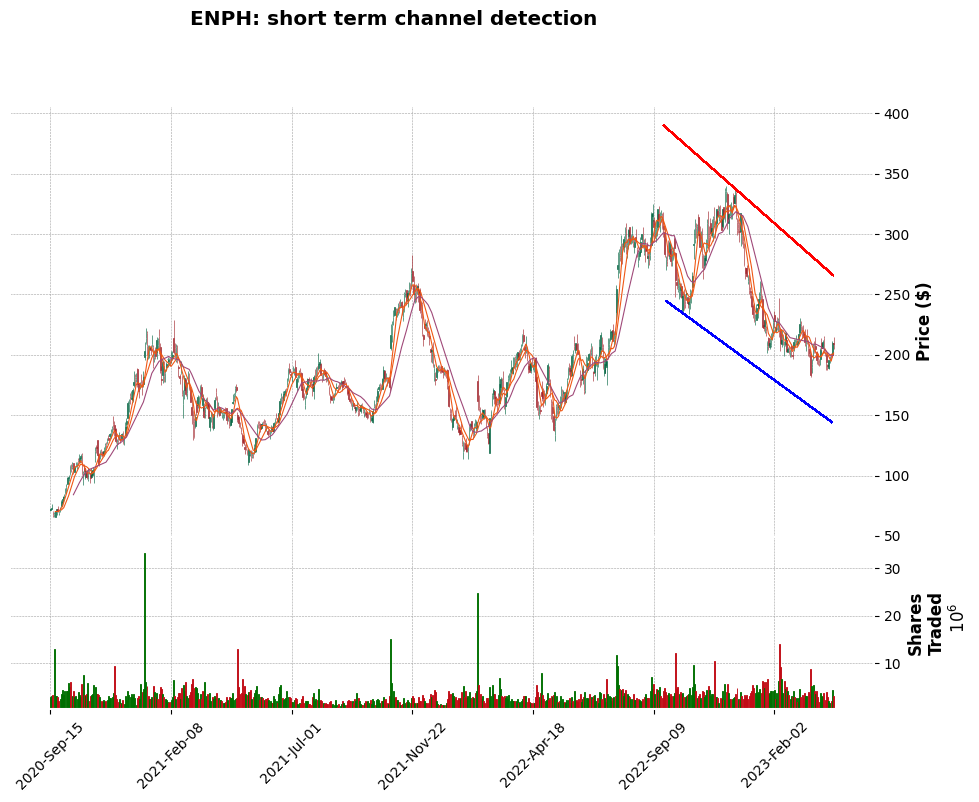

In [4]:

# Load finance data
#ticker = ['AAPL','ENPH']
#df = getdata(ticker,sma_value = [10,60,200],ema_value = [10,60,200],close = "Close")


ticker = ['AAPL','ENPH']
with PdfPages('technical_analysis(list).pdf') as pdf:
    for tic in ticker:
        df = getdata(tic,sma_value = [10,60,200],ema_value = [10,60,200],close = "Close")

        lower, upper = channel_detection(df,min(500,df.shape[0]-15), 15)
        fig, axlist = mpf.plot(df.set_index('Date').tail(650), type='candle', style='charles', mav=(5, 10, 20), volume=True, \
                     figscale=1.5, title=tic+': '+'long term channel detection', \
                     ylabel='Price ($)', ylabel_lower='Shares\nTraded', \
                     alines=dict(alines=[lower,upper], \
                                 colors=['blue', 'red'], linewidths=1.0, linestyle='-'),returnfig=True)
        pdf.savefig(fig)
        lower, upper = channel_detection(df,min(300,df.shape[0]-15), 15)
        fig, axlist = mpf.plot(df.set_index('Date').tail(650), type='candle', style='charles', mav=(5, 10, 20), volume=True, \
                     figscale=1.5, title=tic+': '+'medium term channel detection', \
                     ylabel='Price ($)', ylabel_lower='Shares\nTraded', \
                     alines=dict(alines=[lower,upper], \
                                 colors=['blue', 'red'], linewidths=1.0, linestyle='-'),returnfig=True)
        pdf.savefig(fig)
        lower, upper = channel_detection(df,min(150,df.shape[0]-15), 15)
        fig, axlist = mpf.plot(df.set_index('Date').tail(650), type='candle', style='charles', mav=(5, 10, 20), volume=True, \
                     figscale=1.5, title=tic+': '+'short term channel detection', \
                     ylabel='Price ($)', ylabel_lower='Shares\nTraded', \
                     alines=dict(alines=[lower,upper], \
                                 colors=['blue', 'red'], linewidths=1.0, linestyle='-'),returnfig=True)
        pdf.savefig(fig)

# mpf.plot(df.set_index('Date').tail(950), type='candle', style='charles', mav=(5, 10, 20), volume=True, \
#          figscale=1.5, title=ticker+': '+'long term channel detection', \
#          ylabel='Price ($)', ylabel_lower='Shares\nTraded', \
#          alines=dict(alines=[lower,upper], \
#                      colors=['blue', 'red'], linewidths=1.0, linestyle='-'),returnfig=True)
# plt.savefig('my_figure.pdf', dpi=300)


In [88]:
import telebot

bot_token = '5103512665:AAF6wYaiUbeuiyLVUHLQmp54LmqPWst1O64'
chat_id = '-673924238'

bot = telebot.TeleBot(bot_token)
bot.send_document(chat_id=chat_id, document=open('technical_analysis.pdf', 'rb'))
